In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [49]:
debt = pd.read_csv("debt.csv")
rates = pd.read_csv("rates.csv")

debt = pd.DataFrame(debt)
rates = pd.DataFrame(rates)

In [50]:
debt.head()

,DATE,GFDEBTN
0,1966-01-01,320999.0
1,1966-04-01,316097.0
2,1966-07-01,324748.0
3,1966-10-01,329319.0
4,1967-01-01,330947.0


In [51]:
rates.head()

,DATE,DRCLACBS
0,1987-01-01,3.35
1,1987-04-01,3.28
2,1987-07-01,3.29
3,1987-10-01,3.31
4,1988-01-01,3.27


In [52]:
debt["DATE"] = pd.to_datetime(debt["DATE"])
rates["DATE"] = pd.to_datetime(rates["DATE"])
debt.head()
debt = debt[debt["DATE"].dt.year >= 1987]
debt = debt[debt["DATE"].dt.year <= 2018]
debt.head()
debt.tail()
rates = rates[rates["DATE"].dt.year <= 2018]
rates.tail()
print(len(rates))
print(len(debt))

debt = debt.rename(columns = {"GFDEBTN": "Log Debt"})
rates = rates.rename(columns = {"DRCLACBS": "Consumer Delinquency Rates"})

debt["Log Debt"] = np.log(debt["Log Debt"])

128
128


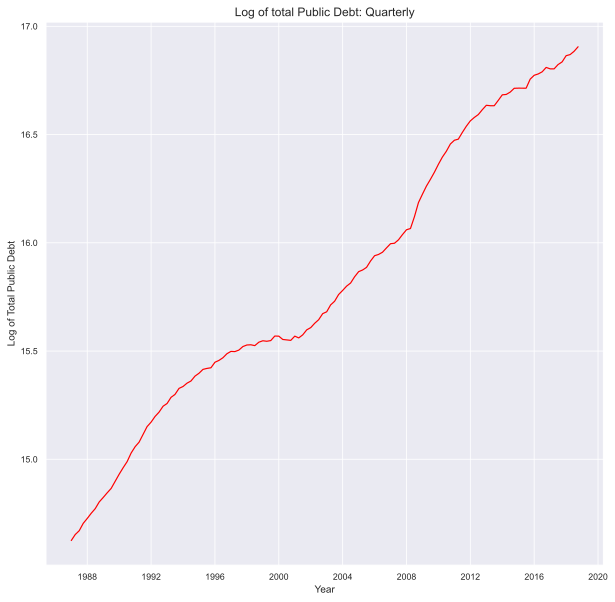

In [71]:
%config InlineBackend.figure_format = 'svg'
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(10,10)})
sns.color_palette("bright")
sns.set_context("paper")
sns.lineplot(data = debt, x = debt["DATE"], y = debt["Log Debt"], color = "red")
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Log of Total Public Debt",fontsize = 10)
plt.title("Log of total Public Debt: Quarterly", fontsize = 12)
plt.savefig('lndebt_graph.png', dpi = 300)
plt.show()

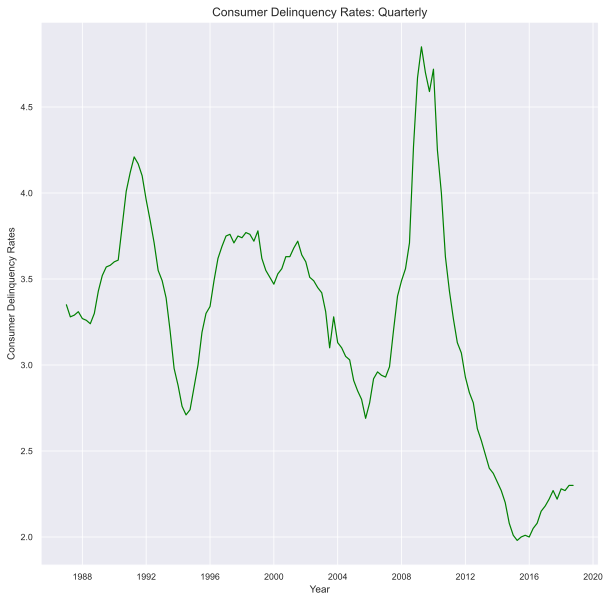

In [72]:
%config InlineBackend.figure_format = 'svg'
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(10,10)})
sns.color_palette("bright")
sns.set_context("paper")
sns.lineplot(data = debt, x = rates["DATE"], y = rates["Consumer Delinquency Rates"], color = "green")
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Consumer Delinquency Rates", fontsize = 10)
plt.title("Consumer Delinquency Rates: Quarterly", fontsize = 12)
plt.savefig('rates_graph.png', dpi=300)
plt.show()